In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


#### EDA tasks:
1. Load the data into a pandas DataFrame
2. Check the first few rows of the DataFrame
3. Check the shape of the DataFrame
4. Check the data types of the columns
5. Check if there are any missing values in the DataFrame
6. Generate summary statistics of the numeric columns
7. Plot a histogram of the 'satisfaction_level' column
8. Plot a boxplot of the 'average_monthly_hours' column
9. Plot a scatterplot of the 'satisfaction_level' vs 'last_evaluation' columns
10. Plot a heatmap of the correlation matrix of the numeric columns.

In [44]:
df = pd.read_csv('F:/apurva documents/datasets/HR_comma_sep.csv')
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [16]:
# Check the shape of the DataFrame
print(df.shape)

(14999, 21)


In [17]:
# Check the data types of the columns
print(df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales_IT                   uint8
sales_RandD                uint8
sales_accounting           uint8
sales_hr                   uint8
sales_management           uint8
sales_marketing            uint8
sales_product_mng          uint8
sales_sales                uint8
sales_support              uint8
sales_technical            uint8
salary_high                uint8
salary_low                 uint8
salary_medium              uint8
dtype: object


In [18]:
# Check if there are any missing values in the DataFrame
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales_IT                 0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
salary_high              0
salary_low               0
salary_medium            0
dtype: int64


In [19]:
# Generate summary statistics of the numeric columns
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

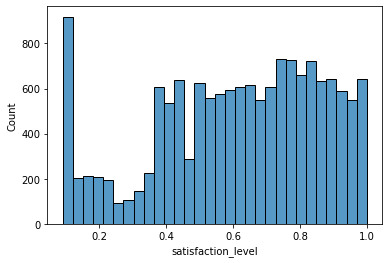

In [20]:
# Plot a histogram of the 'satisfaction_level' column
sns.histplot(df['satisfaction_level'])
plt.show()

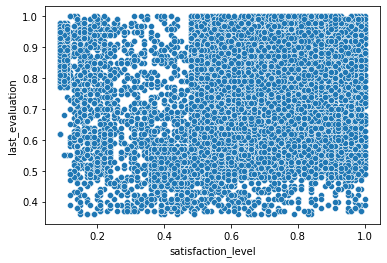

In [22]:
# Plot a scatterplot of the 'satisfaction_level' vs 'last_evaluation' columns
sns.scatterplot(x='satisfaction_level', y='last_evaluation', data=df)
plt.show()

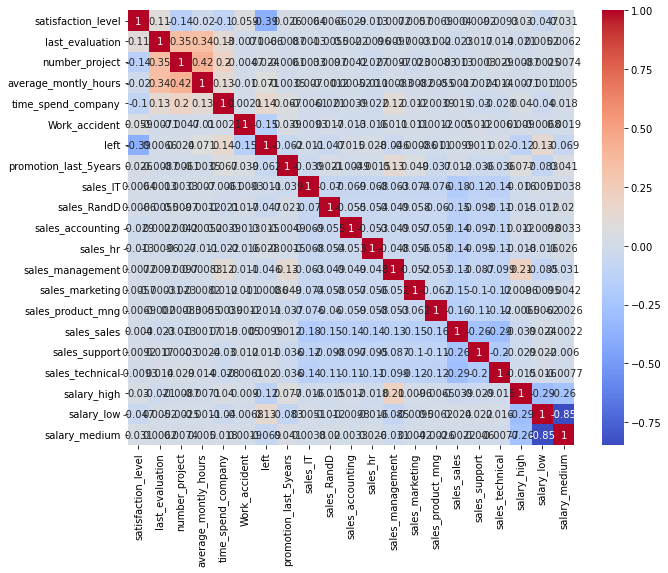

In [24]:
# Plot a heatmap of the correlation matrix of the numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [3]:
# Filter the DataFrame to include only employees who have left
left_df = df.loc[df['left'] == 1]
left_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
# Sort the DataFrame by the satisfaction_level column
sorted_df = df.sort_values(by='satisfaction_level', ascending=False)
sorted_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
2111,1.00,0.92,5,161,3,1,0,0,support,low
10125,1.00,0.66,4,173,2,0,0,0,support,medium
5938,1.00,0.59,5,182,3,1,0,0,management,medium
4724,1.00,0.73,3,245,2,1,0,0,product_mng,low
10906,1.00,0.73,5,189,3,1,0,0,product_mng,low
...,...,...,...,...,...,...,...,...,...,...
190,0.09,0.80,7,283,5,0,1,0,technical,low
14404,0.09,0.82,6,249,4,0,1,0,technical,medium
186,0.09,0.85,6,297,4,0,1,0,hr,medium
14484,0.09,0.96,6,296,4,0,1,0,technical,low


In [5]:
# Group the DataFrame by the sales column and calculate the mean satisfaction_level for each group
grouped_df = df.groupby('sales')['satisfaction_level'].mean()
grouped_df

sales
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64

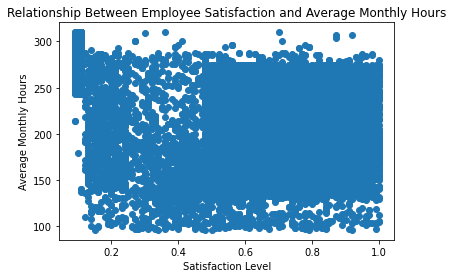

In [6]:
# Create a scatter plot of satisfaction level vs. average monthly hours
plt.scatter(df['satisfaction_level'], df['average_montly_hours'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.title('Relationship Between Employee Satisfaction and Average Monthly Hours')
plt.show()

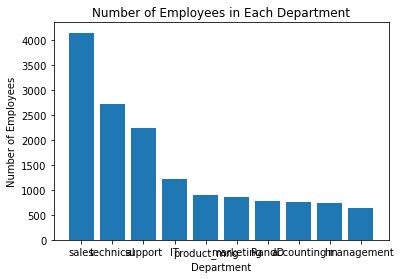

In [7]:
# Count the number of employees in each department
dept_counts = df['sales'].value_counts()

# Create a bar chart of the department counts
plt.bar(dept_counts.index, dept_counts.values)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in Each Department')
plt.show()

In [8]:
import seaborn as sns

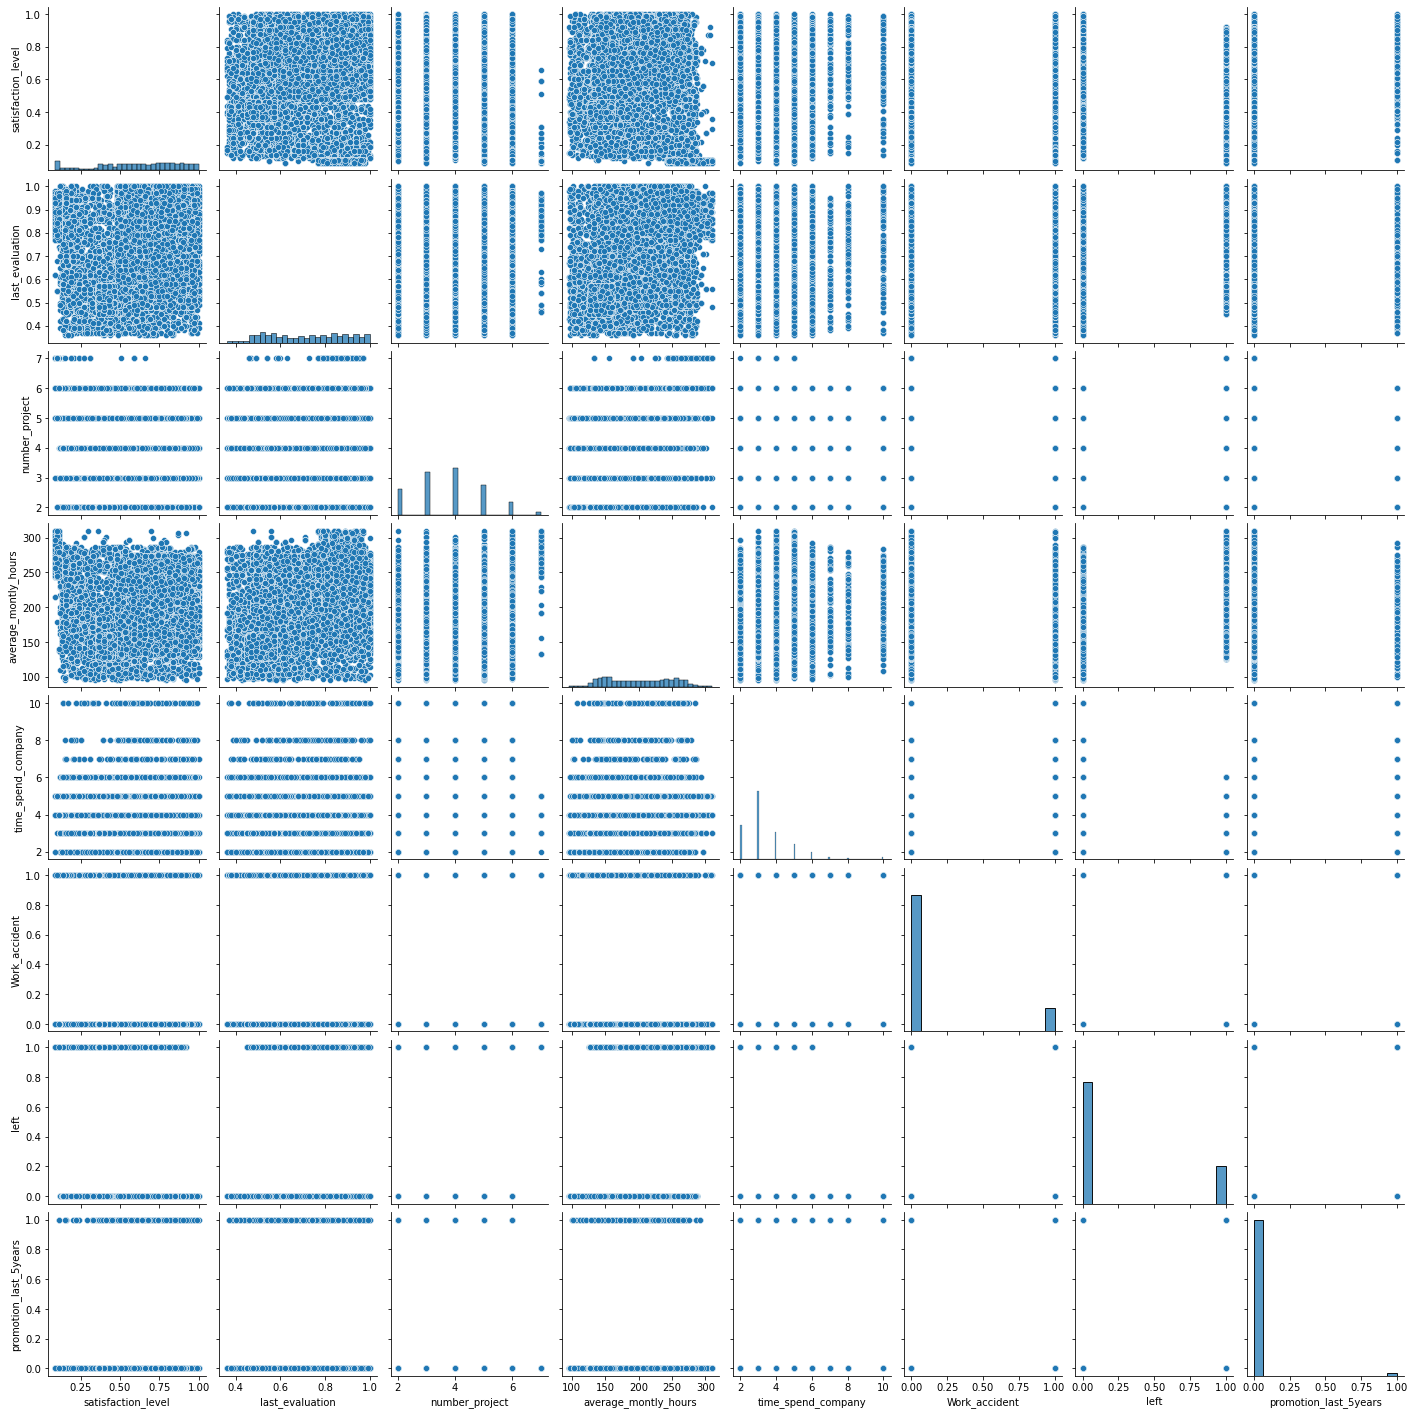

In [9]:
# Use Seaborn's pairplot to visualize the relationship between all possible combinations of variables
sns.pairplot(df)
plt.show()

#### Regression Model

In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['sales', 'salary'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['left'], axis=1), df['left'], test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data and calculate the R-squared score
y_pred = lr.predict(X_test)
r_squared = lr.score(X_test, y_test)

print('R-squared score:', r_squared)


R-squared score: 0.19769627638333742


#### The R-squared score is 0.19769627638333742, which means that your model explains approximately 20% of the variance in the target variable ('left') based on the predictors you used.

While an R-squared of 0.20 is not ideal, it's not necessarily a bad thing either. 
The value of R-squared depends on the context of your data and what you are trying to achieve with your model.

In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


####  Statsmodels to perform a linear regression analysis

In [15]:
import pandas as pd
import statsmodels.api as sm

# Create a linear regression model
X = df[['satisfaction_level', 'time_spend_company']]
y = df['left']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   left   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1451.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        18:11:15   Log-Likelihood:                -7154.2
No. Observations:               14999   AIC:                         1.431e+04
Df Residuals:                   14996   BIC:                         1.434e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5256      0

#### Output:
1. The output provided is the OLS regression results, which includes several important metrics related to the linear regression model.

Here's what each line of the output means:

1. Dep. Variable: The dependent variable in the model, which is 'left' in this case.
2. R-squared: The coefficient of determination, which represents the proportion of variance in the dependent variable that is explained by the independent variables. In this model, the R-squared value is 0.162, which means that the independent variables explain about 16.2% of the variance in the dependent variable.
3. Adj. R-squared: The adjusted R-squared value, which takes into account the number of independent variables in the model and adjusts the R-squared value accordingly. In this model, the adjusted R-squared value is also 0.162.
4. Method: The method used for fitting the model, which is least squares regression in this case.
5. F-statistic: The F-statistic is a measure of the overall significance of the model. In this case, the F-statistic is 1451, which indicates that the model is significant.
6. Prob (F-statistic): The probability of obtaining an F-statistic as extreme as the one observed, assuming the null hypothesis that all the coefficients in the model are zero. In this case, the probability is very low (close to 0), which indicates that the model is statistically significant.
7. Log-Likelihood: The log-likelihood of the model, which is a measure of how well the model fits the data. A higher log-likelihood indicates a better fit.
8. No. Observations: The number of observations in the dataset.
9. Df Residuals: The degrees of freedom for the residuals, which is the number of observations minus the number of independent variables in the model.
10. Df Model: The degrees of freedom for the model, which is the number of independent variables in the model.
11. Covariance Type: The type of covariance used in the model, which is nonrobust in this case.
12. Coefficients: The estimated coefficients for each independent variable in the model, including the intercept. In this model, the coefficients are -0.6469 for satisfaction_level and 0.0311 for time_spend_company.
13. Std Err: The standard error of the estimated coefficients.
14. t: The t-statistic for each estimated coefficient, which measures the number of standard errors that the coefficient is away from zero. The larger the absolute value of the t-statistic, the more significant the coefficient is.
15. P>|t|: The p-value for each estimated coefficient, which indicates the probability of observing a t-statistic as extreme as the one observed, assuming the null hypothesis that the coefficient is zero. A p-value less than 0.05 indicates that the coefficient is statistically significant.
16. [0.025 0.975]: The 95% confidence interval for each estimated coefficient.

### Employee turnover analysis 

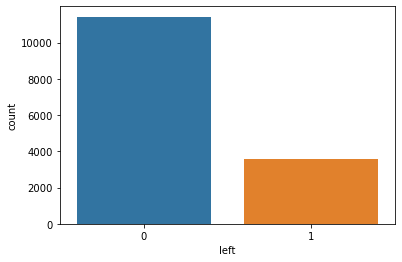

Turnover rate: 23.81 %


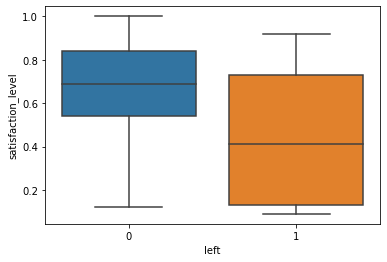

In [26]:
##Explore the distribution of the 'left' column
sns.countplot(x='left', data=df)
plt.show()

# Calculate the turnover rate
turnover_rate = df['left'].mean()
print("Turnover rate:", round(turnover_rate*100, 2), "%")

# Explore the relationship between employee satisfaction level and turnover
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.show()


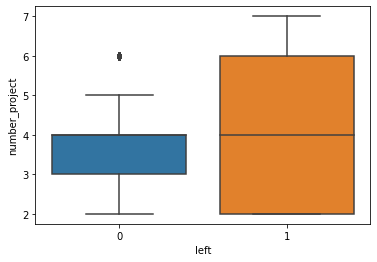

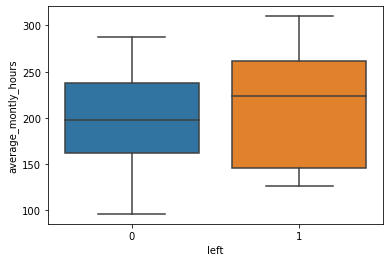

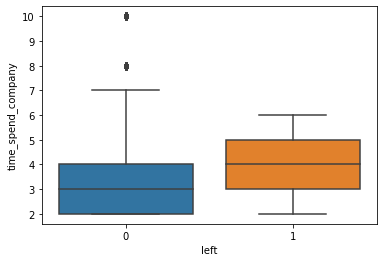

In [27]:
# Explore the relationship between number of projects and turnover
sns.boxplot(x='left', y='number_project', data=df)
plt.show()

# Explore the relationship between average monthly hours and turnover
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.show()

# Explore the relationship between time spent at the company and turnover
sns.boxplot(x='left', y='time_spend_company', data=df)
plt.show()

### Performance analysis

<AxesSubplot:xlabel='last_evaluation', ylabel='average_montly_hours'>

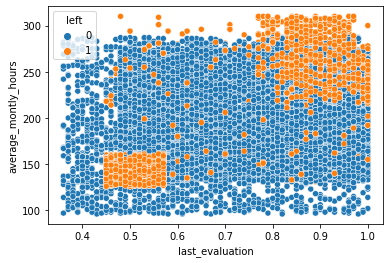

In [28]:

# Create a scatter plot of last_evaluation vs. average_montly_hours, colored by the value of left column
sns.scatterplot(data=df, x='last_evaluation', y='average_montly_hours', hue='left')


Text(0, 0.5, 'Number of Projects')

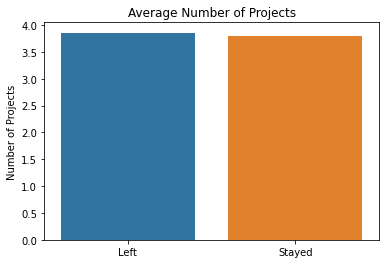

In [29]:
# Create a bar plot of the average number of projects for employees who left vs. those who stayed
left_projects = df[df['left'] == 1]['number_project'].mean()
stayed_projects = df[df['left'] == 0]['number_project'].mean()
sns.barplot(x=['Left', 'Stayed'], y=[left_projects, stayed_projects])
plt.title('Average Number of Projects')
plt.ylabel('Number of Projects')


Text(0, 0.5, 'Proportion')

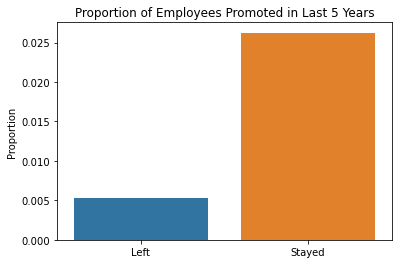

In [30]:
# Create a bar plot of the proportion of employees who were promoted in the last 5 years for those who left vs. those who stayed
left_promotions = df[df['left'] == 1]['promotion_last_5years'].value_counts(normalize=True)
stayed_promotions = df[df['left'] == 0]['promotion_last_5years'].value_counts(normalize=True)
sns.barplot(x=['Left', 'Stayed'], y=[left_promotions[1], stayed_promotions[1]])
plt.title('Proportion of Employees Promoted in Last 5 Years')
plt.ylabel('Proportion')

#### Output: This code will create a scatter plot of the relationship between last evaluation and average monthly hours, colored by the value of the left column (which indicates whether an employee left the company or not). It will also create two bar plots: one showing the average number of projects for employees who left vs. those who stayed, and one showing the proportion of employees who were promoted in the last 5 years for those who left vs. those who stayed.

### Work accident analysis

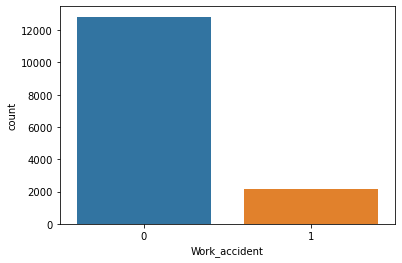

In [32]:
# Plot a countplot to visualize the number of work accidents
sns.countplot(x="Work_accident", data=df)

# Create a new DataFrame containing only employees who have experienced work accidents
accident_df = df[df['Work_accident'] == 1]


In [33]:
# Calculate the average satisfaction level of employees who have experienced work accidents
accident_satisfaction_mean = accident_df['satisfaction_level'].mean()
print(f"Average satisfaction level of employees who have experienced work accidents: {accident_satisfaction_mean}")

Average satisfaction level of employees who have experienced work accidents: 0.6483264177040133


In [34]:
# Calculate the average time spent at the company of employees who have experienced work accidents
accident_time_mean = accident_df['time_spend_company'].mean()
print(f"Average time spent at the company of employees who have experienced work accidents: {accident_time_mean}")


Average time spent at the company of employees who have experienced work accidents: 3.5057630244352236


In [36]:
# Calculate the average monthly hours of employees who have experienced work accidents
accident_hours_mean = accident_df['average_montly_hours'].mean()
print(f"Average monthly hours of employees who have experienced work accidents: {accident_hours_mean}")

Average monthly hours of employees who have experienced work accidents: 199.81834946980175
